Saving Screenshot 2024-12-29 at 20-46-55 하수 수집 관의 내부.png to Screenshot 2024-12-29 at 20-46-55 하수 수집 관의 내부 (2).png
Saving Screenshot 2024-12-29 at 20-47-14 하수 수집 관의 내부.png to Screenshot 2024-12-29 at 20-47-14 하수 수집 관의 내부 (3).png
Saving Screenshot 2024-12-29 at 20-50-40 하수 수집 관의 내부.png to Screenshot 2024-12-29 at 20-50-40 하수 수집 관의 내부 (3).png
Saving Screenshot 2024-12-29 at 21-12-04 하수 수집 관의 내부.png to Screenshot 2024-12-29 at 21-12-04 하수 수집 관의 내부 (3).png


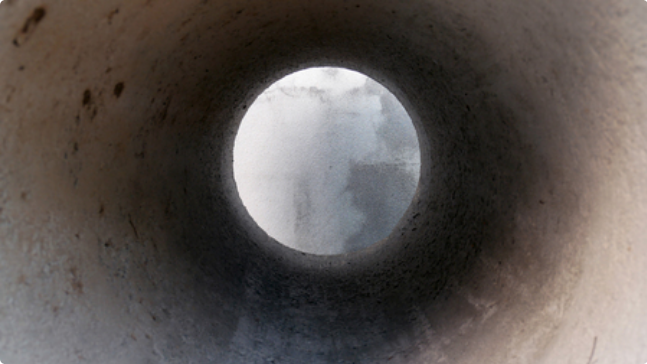

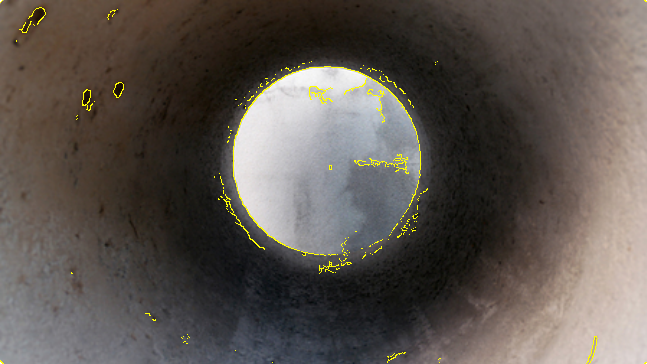

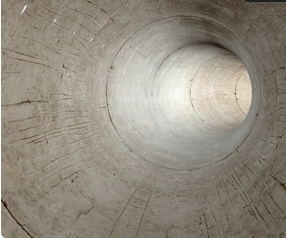

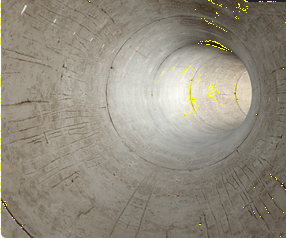

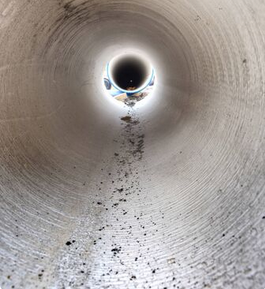

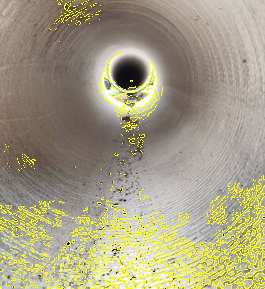

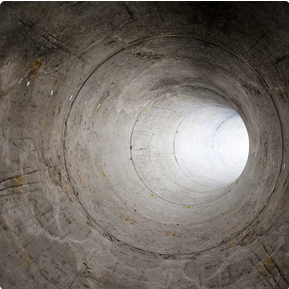

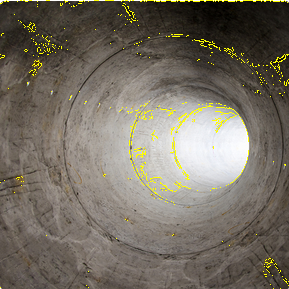

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()
color_threshold = 75   # حد حساسیت تفاوت رنگی پیکسل
canny_threshold1 = 50  # حد پایین الگوریتم کنی
canny_threshold2 = 150  # حد بالای الگوریتم کنی


for filename in uploaded.keys():
    image_path = filename
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # الگوریتم پیدا کردن با پیکسل خیلی متفاوت از پیکسل غالب
    pixels = hsv_image.reshape(-1, 3)
    dominant_color = np.mean(pixels, axis=0)
    diff = np.linalg.norm(pixels - dominant_color, axis=1)
    mask = diff > color_threshold
    mask_image = mask.reshape(hsv_image.shape[:2]).astype(np.uint8)
   # الگوریتم کنی
    edges = cv2.Canny(image, threshold1=canny_threshold1, threshold2=canny_threshold2)


    #  برای کاهش نویز اشتراک جواب ها را به عنوان جواب نهایی انتخاب میکنیم
    defects_mask = cv2.bitwise_and(mask_image, edges)
    result = image.copy()
    result[defects_mask > 0] = [0, 255, 255]
    cv2_imshow(image)
    cv2_imshow(result)
